In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay, voronoi_plot_2d, Voronoi

In [27]:
import numpy as np

def plot_voronoi_square_lattice(size):
    # Generate points for the square lattice
    points = np.array([[i, j] for i in range(size) for j in range(size)])

    # Define colors
    gnbu_colormap = plt.colormaps["GnBu"]
    point_color = gnbu_colormap(0.6)  # Adjusted point color
    voronoi_color = gnbu_colormap(0.4)

    # Compute Voronoi diagram
    vor = Voronoi(points)

    # Plot without axes and title
    fig = plt.figure(figsize=(5, 5), dpi=300)
    ax = fig.add_subplot(111)
    voronoi_plot_2d(
        vor,
        ax=ax,
        show_vertices=False,
        line_colors=voronoi_color,
        line_width=2,
        line_alpha=0.6,
        show_points=False,  # Hide default points
    )
    ax.scatter(points[:, 0], points[:, 1], color=point_color, label="Site")  # Plot with new color
    ax.plot(
        [],
        [],
        color=voronoi_color,
        linewidth=2,
        alpha=0.6,
        label="Voronoi Region",
    )
    plt.tight_layout()
    plt.axis("off")
    plt.legend(loc="lower right", framealpha=1.0)

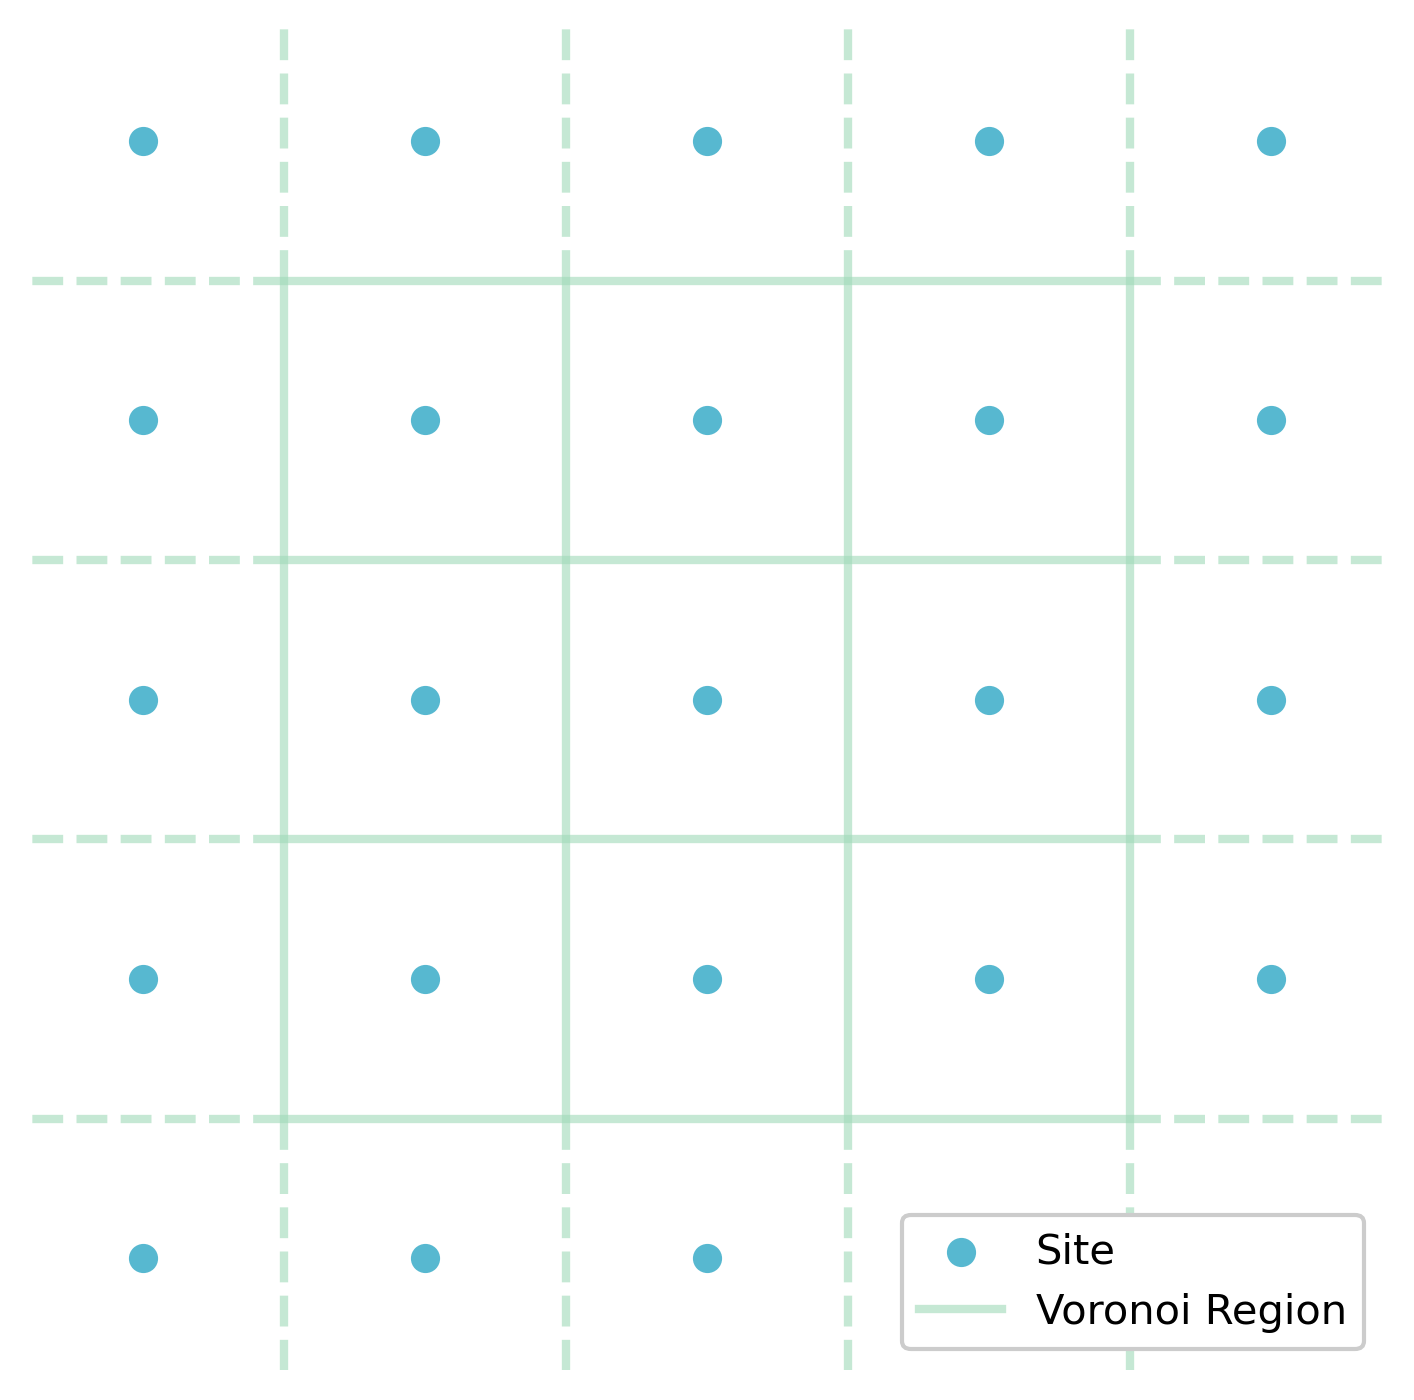

In [28]:
plot_voronoi_square_lattice(5)

---

In [84]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


# Generate points for a 3x3x3 cubic lattice
def generate_cubic_lattice_points(size):
    points = np.array(
        [
            [x, y, z]
            for x in range(size)
            for y in range(size)
            for z in range(size)
        ]
    )
    return points


def plot_cube_lattice(points, elev=30, azim=30):
    fig = plt.figure(figsize=(7, 7), dpi=300)
    ax = fig.add_subplot(111, projection="3d")

    gnbu_colormap = plt.colormaps["GnBu"]
    point_color = gnbu_colormap(0.5)  # Adjusted point color for lattice points
    voronoi_color = gnbu_colormap(0.4)  # Color for connecting lines
    lattice_grid_color = gnbu_colormap(0.2)
    edge_color = voronoi_color # Color for cube edges and vertices

    # Plotting all points in the specified point color for lattice points
    ax.scatter(
        points[:, 0],
        points[:, 1],
        points[:, 2],
        c=[point_color],
        label="Sites",
    )

    # Connect each lattice point only to its direct adjacent neighbors
    for point in points:
        for d in range(3):  # Iterate over dimensions
            for offset in [-1, 1]:  # Positive and negative directions
                neighbor = point.copy()
                neighbor[d] += offset
                if np.all(neighbor >= 0) and np.all(
                    neighbor < 3
                ):  # Check bounds
                    ax.plot(
                        [point[0], neighbor[0]],
                        [point[1], neighbor[1]],
                        [point[2], neighbor[2]],
                        linestyle="dotted",
                        color=lattice_grid_color,
                    )

    # Define the cube at the center with adjusted transparency
    cube_vertices = np.array(
        [
            [0.5, 0.5, 0.5],
            [1.5, 0.5, 0.5],
            [1.5, 1.5, 0.5],
            [0.5, 1.5, 0.5],
            [0.5, 0.5, 1.5],
            [1.5, 0.5, 1.5],
            [1.5, 1.5, 1.5],
            [0.5, 1.5, 1.5],
        ]
    )

    # Define the cube's faces
    cube_faces = [
        [cube_vertices[i] for i in [0, 1, 2, 3]],
        [cube_vertices[i] for i in [4, 5, 6, 7]],
        [cube_vertices[i] for i in [0, 1, 5, 4]],
        [cube_vertices[i] for i in [2, 3, 7, 6]],
        [cube_vertices[i] for i in [1, 2, 6, 5]],
        [cube_vertices[i] for i in [4, 7, 3, 0]],
    ]

    voronoi_color_rgba = voronoi_color[:3] + (
        0.05,
    )  # Adjusted transparency for cube faces

    # Construct and add the cube with transparency and edge color
    cube = Poly3DCollection(
        cube_faces,
        facecolors=[voronoi_color_rgba],
        linewidths=1,
        edgecolors=edge_color,
    )
    ax.add_collection3d(cube)
    ax.view_init(elev=elev, azim=azim)

    # Remove axis and adjust layout
    ax.set_axis_off()
    plt.legend()
    plt.tight_layout(pad=0)
    plt.show()

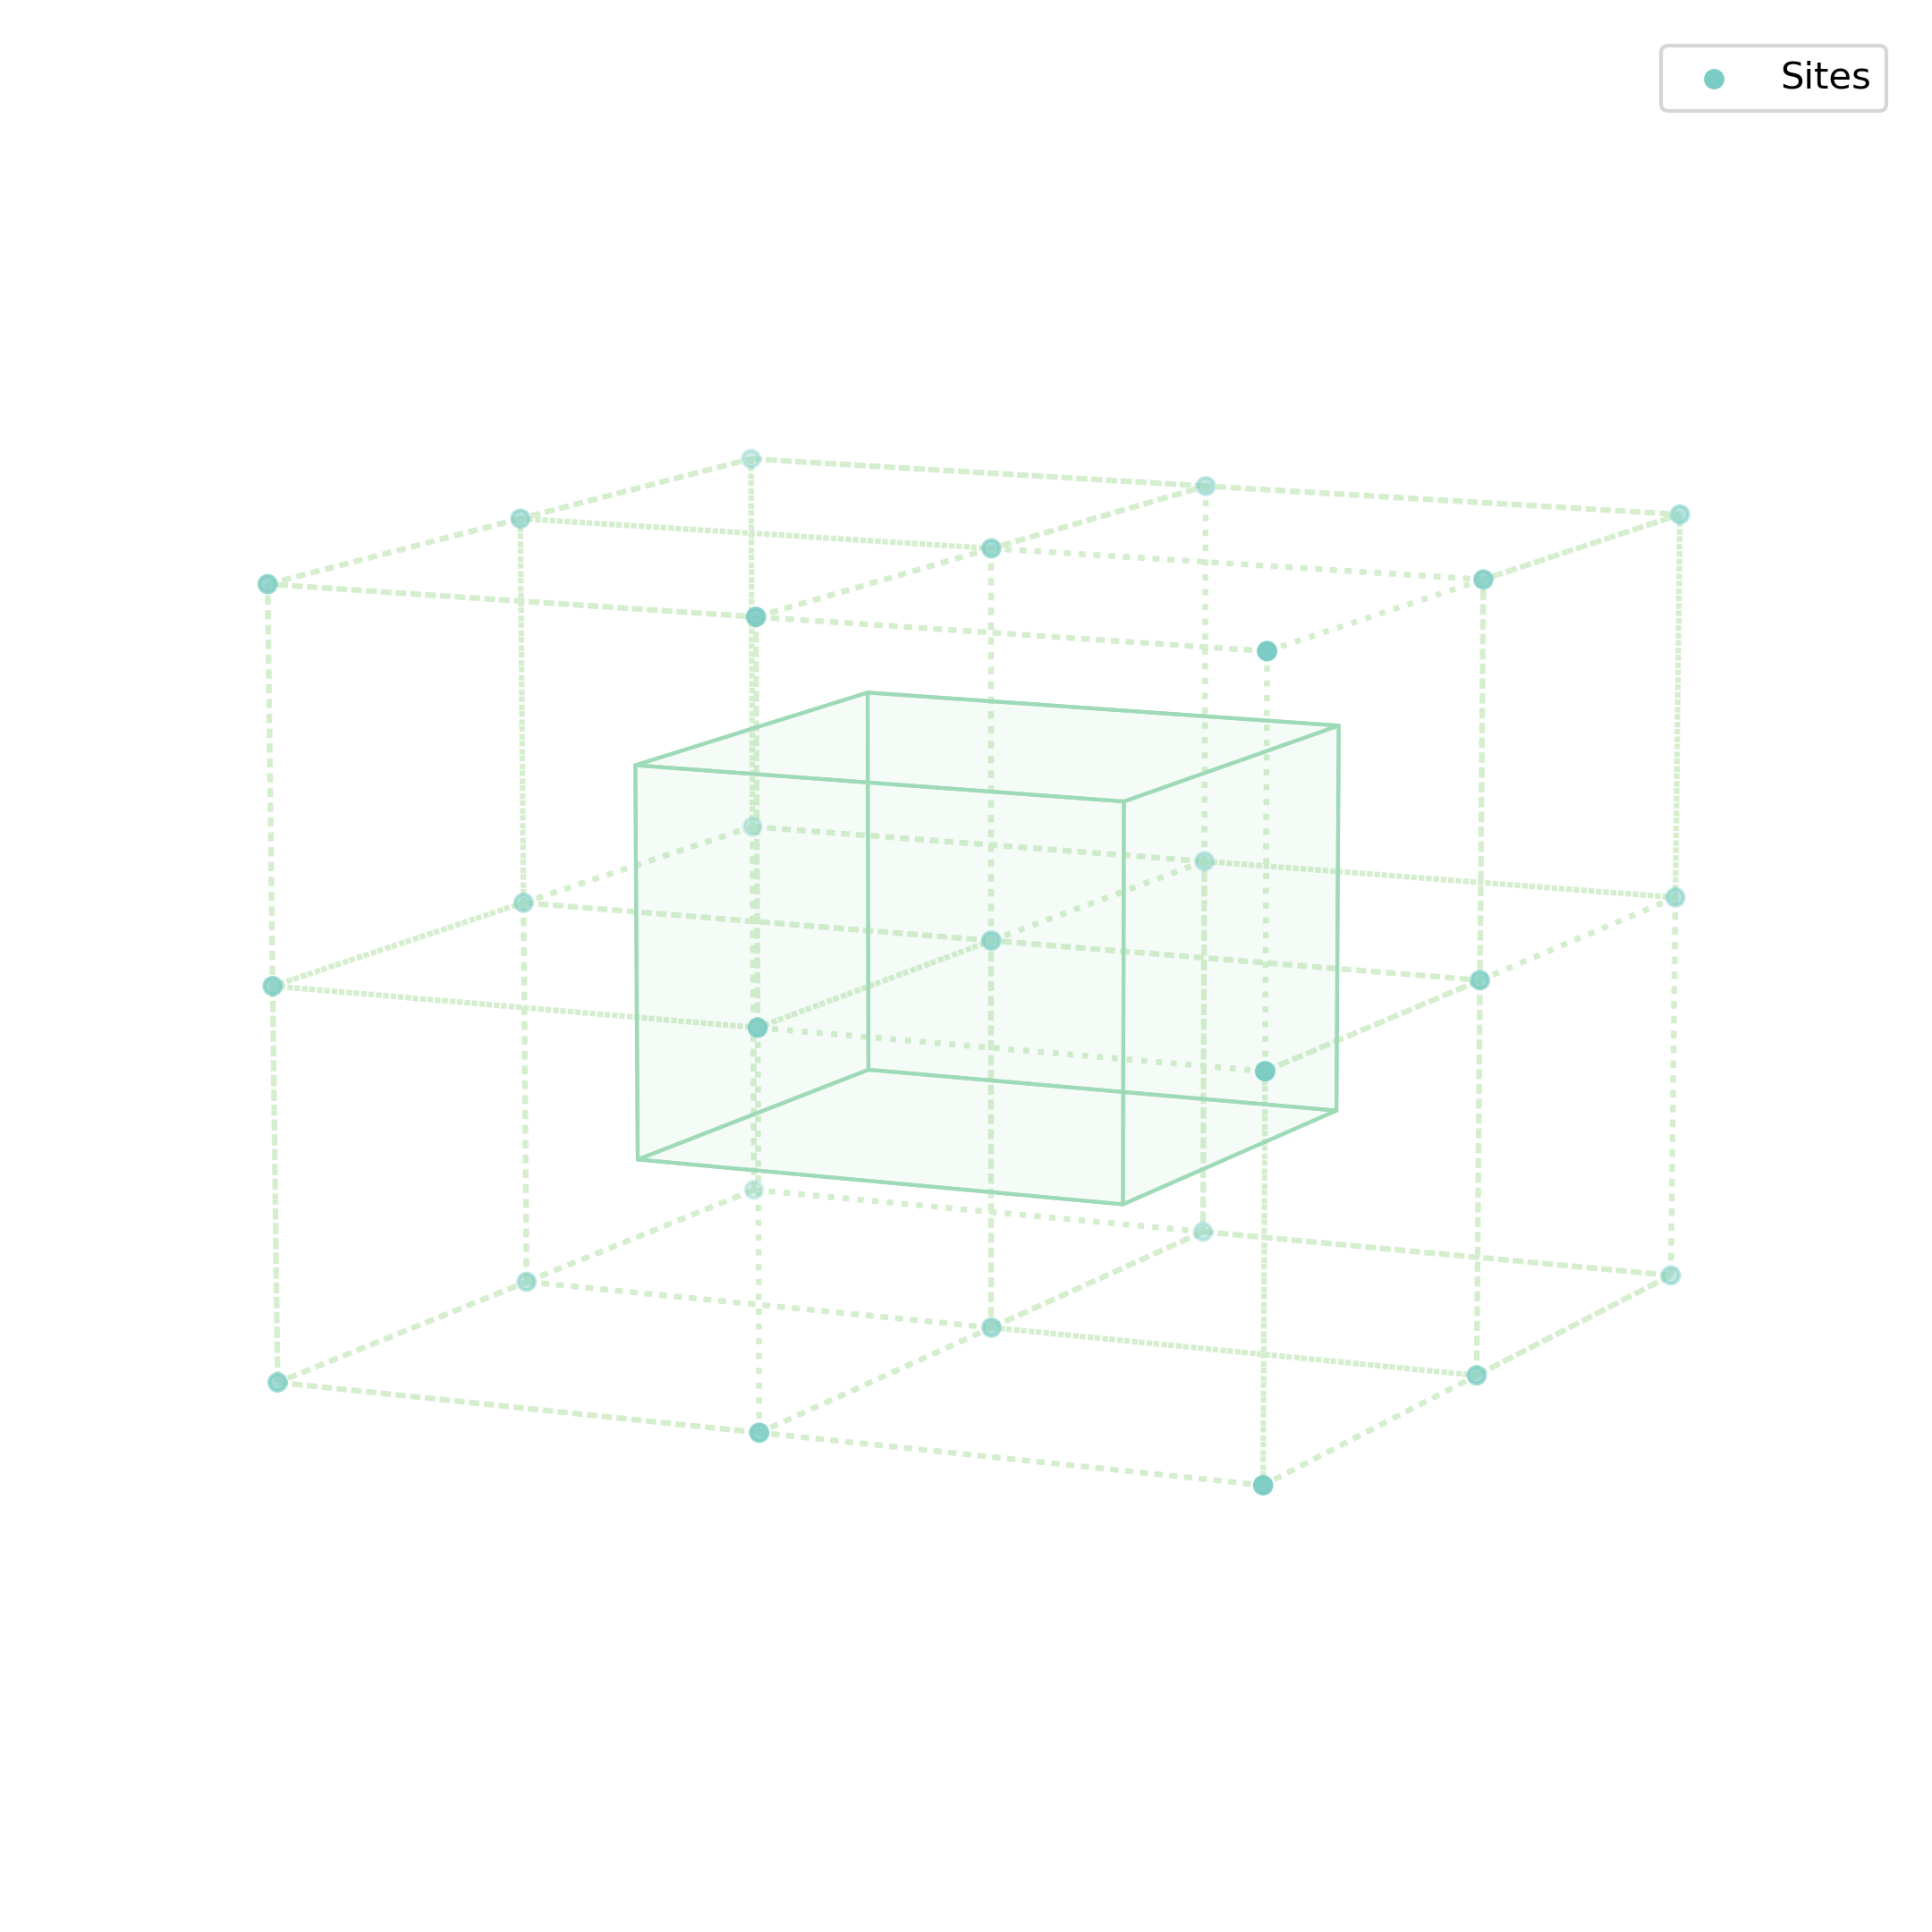

In [85]:
# Plot the cubic lattice points with a central transparent unit cube
cubic_points = generate_cubic_lattice_points(3)
plot_cube_lattice(cubic_points, elev=10, azim=25)